In [5]:
%matplotlib inline
import io, os
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

In [6]:
def walk(n):
    'starting at x=0, step left/right with probability 1/2 until x=i'
    x = 0
    for i in range(n):
        x += np.random.choice([-1,1]) # equi-probable left-right move
        yield x

In [15]:
n = 5000
f = np.array([i for i in walk(n)]) # x as an array...

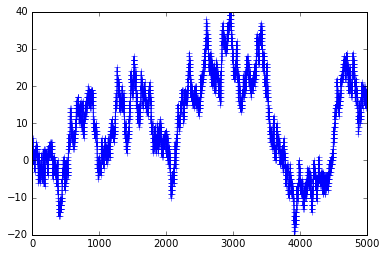

In [16]:
plt.figure()
plt.plot(f, '+-')
plt.show()

In [17]:
dct_f = fftpack.dct(f, norm='ortho')

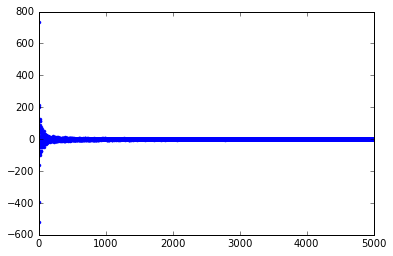

In [22]:
plt.plot(dct_f, '.')
plt.show()

In [35]:
f2 = fftpack.idct(dct_f, norm='ortho')

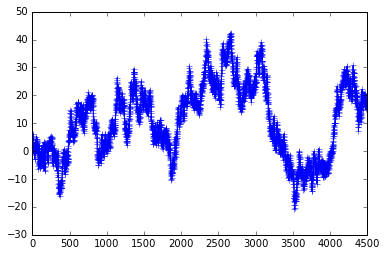

In [33]:
plt.plot(f2, '+-')
plt.show()

In [34]:
def clip_to_f(f, reconstructed_f):
    clipped_f = reconstructed_f.copy()
    
    minf, maxf = np.min(f), np.max(f)
    range_of_f = maxf - minf
    
    minr, maxr = np.min(reconstructed_f), np.max(reconstructed_f)
    range_of_r = maxr - minr
    
    gain = range_of_f / range_of_r
    clipped_f *= gain
    
    offset = minf - np.min(clipped_f)
    clipped_f += offset
    
    return clipped_f

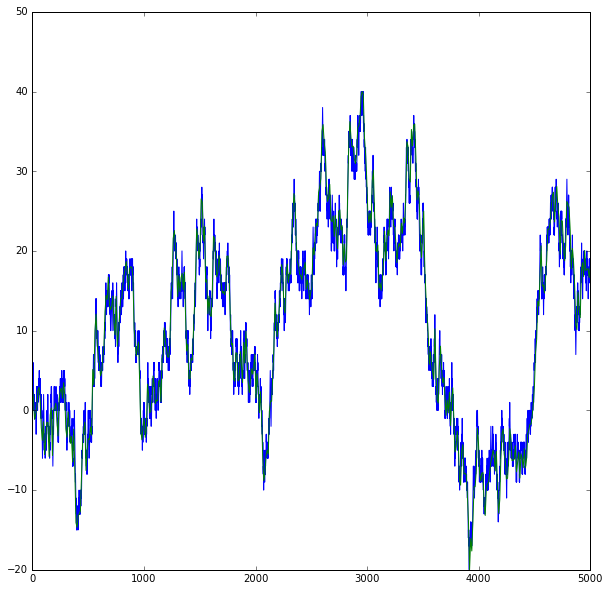

In [36]:
leave_out = 4500
sli = slice(0,n-leave_out,1)
compressed_f = dct_f[sli]
m = compressed_f.size

reconstructed_f = fftpack.idct(compressed_f, norm='ortho')
clipped_f = clip_to_f(f, reconstructed_f)

plt.figure(figsize=(10,10))
plt.plot(np.arange(n), f, 'b-')
plt.plot(np.linspace(0, n, m), clipped_f, 'g-')
#plt.plot(np.linspace(0, n, m), reconstructed_f, 'r-')
plt.show()